Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

In [1]:
Name = "Chakrya Ros"

---

# Homework 2: VC Dimension, Decision Trees, Validaiton 



## Part 1: VC Dimension

Answer the below questions by filling your answer in as markdown in the cells provided.

### Question 1 (This is a multipart question. Be sure to respond to each part).
1. For a given finite set of $N$ elements represented by the set A, what is the total number of possible binary labelings?

2. Let C(A) be the set of all distinct labelings of A generated by the hypothesis class C. What is the maximum size, |C(A)| of C(A)? We are asking in general, not for a specific C. Recall the |C(A)| means the number of elements in C(A). 
3. What happens if |C(A)| is smaller than the maximum size above?
4. Give a definition of shattering based on the above.
5. Give a definition of VC dimension using the above definition of shattering. 


Write the definition here.

YOUR ANSWER HERE

1. The total number of possible binary labelings is $2^n$.

2. The maximum size |C(A)| is $2^{2^n}$

3. if |c(A)| is smaller than the maximun size, then we can shatter all the points.

4. A hypothesis class C can shatter N data points for which we can find a hypythosis c in C that separate the label, then we say C shatter N points.

5. VC dimension of a hypothesis class C is the maximum number of data points which can be shattered by C.


1.2: Consider the following: 

Let $A$ be a set of points on the real line, which each can be labeled as either +1 or -1.

Suppose you consider the hypothesis class given by the function $f: \mathbb{R} \rightarrow \mathbb{R}$ where $f$ is continuous and piecewise-linear. For each element $x \in A$, we label $x$ as $+1$ if $f(x) > 0$, otherwise we label it $-1$. If we restrict the number of different linear regions of $f$ to $N$, what is the VC dimension of $f$?

"Different linear regions" means what it sounds like, but here is what we mean formally:
The least number of non-intersecting intervals such that the union of the intervals is the whole real line and the slope of $f$ is different on an interval from the intervals immediately adjoining that interval.

For example, $f(x) = |x|$ has two linear regions, and 

$$ f(x) = \begin{cases}
      |x-2|, & \text{if}\ x > 0 \\
      |x+2|, & \text{otherwise}
    \end{cases} $$
    
has four linear regions.

Note: This problem is closely related to similar problems in understanding the complexity of neural networks.

YOUR ANSWER HERE

The VC dimension of f is $N+1$ that the data points can be shattered

1.3: Consider the following: Your data consists of points situated along the unit circle (they cannot be inside or outside of the circle, only on the boundary/line defined by the circle). What is the VC dimension of the hypothesis class defined by quadralaterals inscribed in the circle? (The corners of the quadrilateral must be on the circle).

YOUR ANSWER HERE

VC dimension of the hypothesis class is 4 because the quadralaterals inscribed in the circle is 4. If there were 5 pionts to classify, we can't classify them with qualruple shape.

1.4:
For a set of $N$ points $X$, if a hypothesis class $C$ has VC dimension $D$, give two **upper bounds** on how many binary labelings there for the application of $C$ to $X$. Which upper bound is tighter and when?

YOUR ANSWER HERE

If the VC dimension of C is finite, we know the maximum size of all distinct labeling is $N^D$. As long as we have more points than VC dimension (i.e. N > D), this is a much tighter bound, i.e.  $N^D \leq 2^D$

## Part 2: Decision Tree and Validaiton 

We will use a pre-processed natural language dataset.

**Task**:

Classify emails as "spam" or "not spam" based on word frequency data. 

**Dataset**:

Our dataset is contained in the CSV file "spamdata.csv". Each row contains the word frequency for 54 words plus statistics on the longest "run" of captial letters. 

Word frequency is given by:

$$ f_i = m_i / N $$ 

Where $f_i$ is the frequency for word $i$, $m_i$ is the number of times word $i$ appears in the email, and $N$ is the total number of words in the email.

We wrote a function below that reads in the data, splits it into a train and test set, and also gives you the names for the feature columns.

**Method**:

We will use decision trees to classify the emails.

In [2]:
import numpy as np
from matplotlib import pyplot as plt


### Loading the Data

Below you will implement a function to load the .csv file "spamdata.csv" which has been provided for you. The function must:

1. Shuffle the dataset
2. Split into training and testing splits based off of the parameter test_split
3. Return both training and testing data (features and labels each).

You can use Numpy, Pandas, and Scikit learn functions to accomplish this. 
You may use the Scikit-Learn function `train_test_split`.

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd


def get_spam_dataset(filepath="./spamdata.csv", test_split=0.1):
    '''
    get_spam_dataset
    
    Loads csv file located at "filepath". Shuffles the data and splits
    it so that the you have (1-test_split)*100% training examples and 
    (test_split)*100% testing examples.
    
    Args:
        filepath: location of the csv file
        test_split: percentage/100 of the data should be the testing split
        
    Returns:
        
        X_train, X_test, y_train, y_test, feature_names
        
        (in that order)
        first four are  np.ndarray
        
    '''
    
    # YOUR CODE HERE
    dataset = pd.read_csv(filepath, sep='\s+', header=None)
    
    #x contains data set
    X = dataset.iloc[1:, :-1].values
    X = X.astype(float)
    
    #y contains the labels
    y = dataset.iloc[1:, 57].values
    y = y.astype(float)
    feature_name = dataset.iloc[:1, : ].values
#     print(X.shape[0])
#     print(y.shape[0])
#     print(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, shuffle = True)
#     print(y_test.shape[0])
#     print(X_train.shape[0])
    return X_train, X_test, y_train, y_test, feature_name


In [4]:
# Sanity check tests - not comprehensive
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()
assert(type(X_train) == np.ndarray)
assert(type(X_test) == np.ndarray)
assert(type(y_train) == np.ndarray)
assert(type(y_test) == np.ndarray)

assert(np.sum(y_test == 1.0) > 0)
assert(np.sum(y_train == 0.0) > 0)

assert(X_train.shape[0] == 4140)
assert(X_train.shape[1] == 57)
assert(y_test.shape[0] == 461)

print("Feature names: {}".format(feature_names))

Feature names: [['word_freq_make' 'word_freq_address' 'word_freq_all' 'word_freq_3d'
  'word_freq_our' 'word_freq_over' 'word_freq_remove'
  'word_freq_internet' 'word_freq_order' 'word_freq_mail'
  'word_freq_receive' 'word_freq_will' 'word_freq_people'
  'word_freq_report' 'word_freq_addresses' 'word_freq_free'
  'word_freq_business' 'word_freq_email' 'word_freq_you'
  'word_freq_credit' 'word_freq_your' 'word_freq_font' 'word_freq_000'
  'word_freq_money' 'word_freq_hp' 'word_freq_hpl' 'word_freq_george'
  'word_freq_650' 'word_freq_lab' 'word_freq_labs' 'word_freq_telnet'
  'word_freq_857' 'word_freq_data' 'word_freq_415' 'word_freq_85'
  'word_freq_technology' 'word_freq_1999' 'word_freq_parts'
  'word_freq_pm' 'word_freq_direct' 'word_freq_cs' 'word_freq_meeting'
  'word_freq_original' 'word_freq_project' 'word_freq_re' 'word_freq_edu'
  'word_freq_table' 'word_freq_conference' 'char_freq_;' 'char_freq_('
  'char_freq_[' 'char_freq_!' 'char_freq_$' 'char_freq_#'
  'capital_run_le

### 2.0: Data Exploration Part 1

In the cell below, perform some initial analysis on the dataset. You must **at least answer the below two questions:**

1. Do we have a balanced set of examples (equal amount of SPAM and NOT SPAM examples) in the training and test datasets? 
2. Try to figure out with a couple plots which words have the biggest impact on an example being SPAM vs. NOT SPAM. Hint: calculate the emperical conditional probability $p(y=SPAM|x>t)$ for each feature $x$ and a reasonable threshold $t$.

(4140,)
Training datasets that are SPAM: 1621
Training datasets that are NOT SPAM: 2519

Test datasets that are SPAM: 192
Test datasets that are NOT SPAM: 269

1. No, we don't have a balanced set of SPAM and NOT SPAM in the training and test datasets


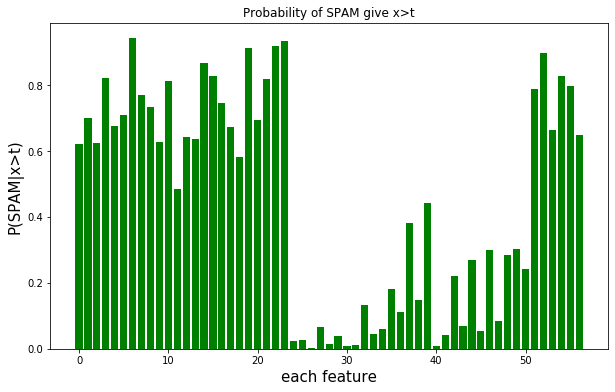

<function matplotlib.pyplot.show(*args, **kw)>

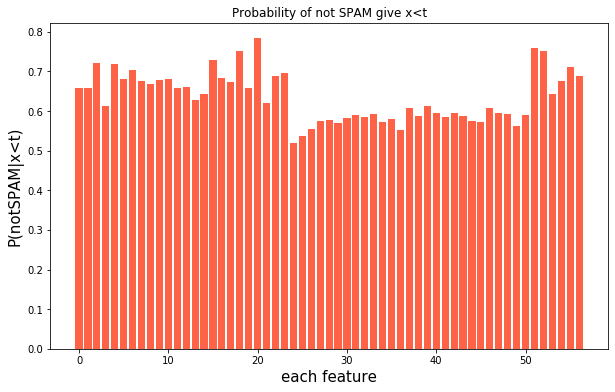

In [5]:

# YOUR CODE HERE
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()

spam = 0
notSpam = 0
print(y_train.shape)
for i in y_train:
    if i==0.0:
        notSpam +=1
    else:
        spam +=1
        
print("Training datasets that are SPAM: {}".format(spam))
print("Training datasets that are NOT SPAM: {}".format(notSpam))

spamTest = 0
notSpamTest = 0
for i in y_test:
    if i==0:
        notSpamTest +=1
    else:
        spamTest +=1
print()        
print("Test datasets that are SPAM: {}".format(spamTest))
print("Test datasets that are NOT SPAM: {}".format(notSpamTest))

print()
print("1. No, we don't have a balanced set of SPAM and NOT SPAM in the training and test datasets")

#calculate the average
threshold = X_train.mean(axis=0)
y_mask = y_train==1
x_mask = X_train>threshold

'''Calculate the probability of spam given x>t'''
prob = np.logical_and(x_mask, y_mask[:,None])
sum_prob = prob.sum(axis=0)
sum_x_mask = x_mask.sum(axis=0)
prob_spam_x = sum_prob/sum_x_mask

fig, ax = plt.subplots( nrows = 1, ncols =1, figsize=(10,6))
plt.bar(range(57), prob_spam_x, color='green')
plt.ylabel("P(SPAM|x>t)", fontsize=15)
plt.xlabel("each feature", fontsize=15)
plt.title("Probability of SPAM give x>t")
plt.show()


'''Calculate the probability of not spam given x<t'''
y_mask_notSpam = y_train==0
x_mask1 = X_train<threshold
prob1 = np.logical_and(x_mask1, y_mask_notSpam[:,None])
sum_prob_notSpam = prob1.sum(axis=0)
prob_notSpam_x = sum_prob_notSpam/x_mask1.sum(axis=0)

fig, ax = plt.subplots( nrows = 1, ncols =1, figsize=(10,6))
plt.bar(range(57), prob_notSpam_x, color ="tomato")
plt.ylabel("P(notSPAM|x<t)", fontsize=15)
plt.xlabel("each feature", fontsize=15)
plt.title("Probability of not SPAM give x<t")
plt.show


# #find the index that has high frequency
# maxprob = 0.0
# index = -1
# for idx, p in enumerate(prob_spam_x):
#     sumSpam_not= prob_spam_x[idx] + prob_notSpam_x[idx]
#     if maxprob < sumSpam_not:
#         maxprob = sumSpam_not
#         index = idx
        
# array = [prob_spam_x[index], prob_notSpam_x[index]] 



# # plt.hist(array)
# print("Probability of spam given x>t : {}".format(prob_spam_x[index]))
# print("Probability of not spam given x<t : {}".format(prob_notSpam_x[index]))
# print("Feature that is the best for split data is {} .".format(feature_names[0, index]))


      

### 2.1: Develop the Model

Fill out the below functios that construct your Scikit-Learn model.

In [6]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix


def build_dt_class_model(data_X, data_y, max_depth = None):
    '''
    This function builds the decision tree classifier and 
    fits it to the provided data.
    
    Arguments
        data_X - a np.ndarray
        data_y - np.ndarray
        max_depth - None if unrestricted, otherwise an integer for the maximum
                depth the tree can reach.
    
    Returns:
        A trained DecisionTreeClassifier
    '''
    
    # YOUR CODE HERE
    dt = DecisionTreeClassifier(max_leaf_nodes=None, max_depth=max_depth)
    dt.fit(data_X, data_y)
    
    return dt

[]

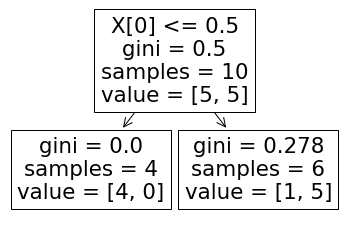

In [7]:
# Sanity check tests
x_ut = np.zeros((10,2))
y_ut = np.zeros((10,))
x_ut[0:6,0] = np.ones_like(x_ut[0:6,0])
x_ut[0,:2] = 1
x_ut[0,8:] = 1
y_ut[0:5] = np.ones_like(y_ut[0:5])
dt_model = build_dt_class_model(x_ut, y_ut, 1)

assert(type(dt_model) == DecisionTreeClassifier)
x_ut_test = np.array([[0.0, 0.0], [1.0, 1.0]])
y_hat_ut = dt_model.predict(x_ut_test)
assert(y_hat_ut[0] == 0)
assert(y_hat_ut[1] == 1)
assert(dt_model.get_depth() == 1)

plot_tree(dt_model)
plt.plot()

### Precision and Recall Functions 

Fill in the below functions that calculate precision and recall based on vectors of labels and vectors of predictions. 

This is a binary classificaiton problem, therefore we can label all points as either positive (SPAM) or negative (NOT SPAM). 

"True postives" (TP) are emails we predict to be SPAM, and those emails also have true label SPAM.
"False positives" (FP) are emails we predict to be SPAM but have true label NOT SPAM. 

The same reasoning applies to "true negative" (TN) and "false negative" (FN). 

Precision is: (TP)/(TP + FP). Note the denominator is the number of positive predictions. 

Thus precision is roughly a measure of how "useful" your positive predicitons are. 

Recall is: (TP)/(TP+FN). Note the denominator is thenumber of positive labels. 

Thus recall is roughly a measure of how "complete" your positive predictions are. 

In [8]:
def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates precision for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    # YOUR CODE HERE
    conf_matric = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matric.ravel()
    precision = tp/(tp+fp)
#     print(conf_matric)
    return precision

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates recall for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    
    # YOUR CODE HERE
    conf_matric = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matric.ravel()
    
    recall = tp/(tp + fn)
    return recall


In [9]:
# Sanity check tests
ut_true = np.array([1.0, 1.0, 0.0, 0.0])
ut_pred = np.array([1.0, 1.0, 1.0, 1.0])
prec = calculate_precision(ut_true, ut_pred, 1.0)
recall = calculate_recall(ut_true, ut_pred, 1.0)
print(prec)
print(recall)
assert(prec == 0.5)
assert(recall == 1.0)

0.5
1.0


### 2.2: Analyze and Interpret the Model

In this section we will analyze the performance of our model on the Spam dataset. We will attempt to understand how the model makes decisions and why a particular split was chosen in the beginning levels of the tree (close to the root).

Unlike the last homework, less is written out before hand for you. You must write all the code to perform the analysis.

1. To avoid touching the test set, split the X_train and y_train arrays into X_train, y_train, and X_valid, y_valid datasets. Use ~10% of the training datset for the validation.

2. Create a model with a shallow max_depth of 2. Build the model on the training set.

3. Report precision/recall on the training and validation sets.

4. Report depth of the tree.

5. Plot the tree using the `plot_tree` function. 

You may want to use `plt.figure(figsize=(10,10))` to make the tree plot bigger.

Precision on the Training set: 0.9224062772449869
Precision on the Validation set: 0.9302325581395349

Recall on the Training set: 0.7168021680216802
Recall on the Validation set: 0.7407407407407407

The depth of the Tree is 2


[]

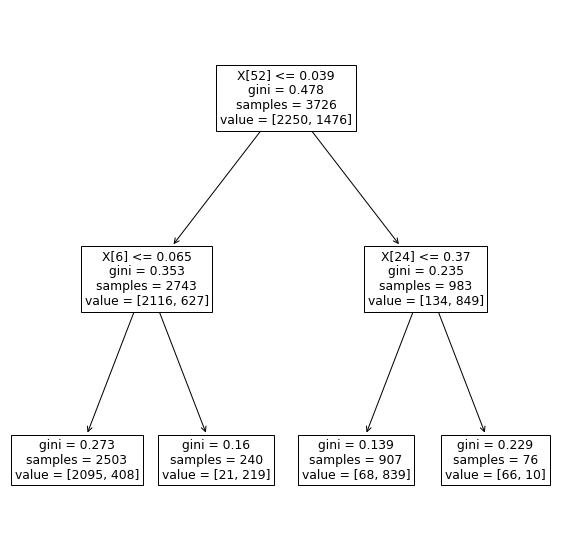

In [10]:
# First line here resets the X_train, y_train values. 
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()
# print(feature_names)
# YOUR CODE HERE
# raise NotImplementedError()
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size=0.1)
dt_model = build_dt_class_model(X_train1, y_train1, 2)


#calculate precision on training set
y_pred_train = dt_model.predict(X_train1)
prec_on_train = calculate_precision(y_train1, y_pred_train)
print("Precision on the Training set: {}".format(prec_on_train))

#calculate precision on validation set
y_pred_valid = dt_model.predict(X_valid)
prec_on_valid = calculate_precision(y_valid, y_pred_valid)
print("Precision on the Validation set: {}".format(prec_on_valid))
print()

#calculate recall on training set
recall_on_train = calculate_recall(y_train1, y_pred_train)
print("Recall on the Training set: {}".format(recall_on_train))

#calculate recall on validation set
recall_on_valid = calculate_recall(y_valid, y_pred_valid)
print("Recall on the Validation set: {}".format(recall_on_valid))

print()
print('The depth of the Tree is {}'.format(dt_model.get_depth()))

plt.figure(figsize=(10,10))

plot_tree(dt_model)
plt.plot()

Now you must interpret the model. We provide one cell for you to write your answers in markdown and one cell for you to write any extra code.
    
1. Describe which features the tree uses to make the decisions, and how they influence the SPAM/NOT SPAM decision. You should be refering to 3 different features for depth of 2. Use the text names of the features, not their indices.


In [11]:
# YOUR CODE HERE
# raise NotImplementedError()
print(feature_names[0, 52])
print(feature_names[0, 24])
print(feature_names[0, 6])

char_freq_$
word_freq_hp
word_freq_remove


YOUR ANSWER HERE:

char_freq_$, word_freq_hp and word_freq_remove are features that tree uses to make the decision to split the tree because it gave high probability of spam given x>t and probability of not spam given x<t. 



### 2.2: Perform  Validation to Select the Depth Parameter 

In this section we will perform validation to selectthe depth parameter. Unlike in class, this time we will ask you to perform validation using a random subsample of 25% of the training data. Your task is the following:

1. It is recommended in the beginning of your code to call `X_train, X_test, y_train, y_test = get_spam_dataset()` to reset the data variables. Only call this once in the cell.
2. Split off a valiation dataset with ~25% of your training dataset. Do this only once in your cell. All models you build will be evaluated on this same validation dataset. 
2. Write code that builds a models for max_depths of within a range of values (a good set might be 20 numbers in the interval 1-40). You should get the precision and recall performance on the validation set and store them in arrays.

Once you have the above, you should generate two plots:

1. The first plot should plot two lines - the precision and recall performance. The x-axis should be your `max_depth` values and the y_axis should be between 0 and 1. Include a legend (`plt.legend`) and label the precision and recall lines.

2. Create a scatter plot (not a line plot) that scatters your precision and recall values so that precision is the y axis and recall is your x axis.


max_depth 1 get depth 1
max_depth 3 get depth 3
max_depth 5 get depth 5
max_depth 7 get depth 7
max_depth 9 get depth 9
max_depth 11 get depth 11
max_depth 13 get depth 13
max_depth 15 get depth 15
max_depth 17 get depth 17
max_depth 19 get depth 19
max_depth 21 get depth 21
max_depth 23 get depth 23
max_depth 25 get depth 25
max_depth 27 get depth 27
max_depth 29 get depth 27
max_depth 31 get depth 27
max_depth 33 get depth 27
max_depth 35 get depth 27
max_depth 37 get depth 27
max_depth 39 get depth 27


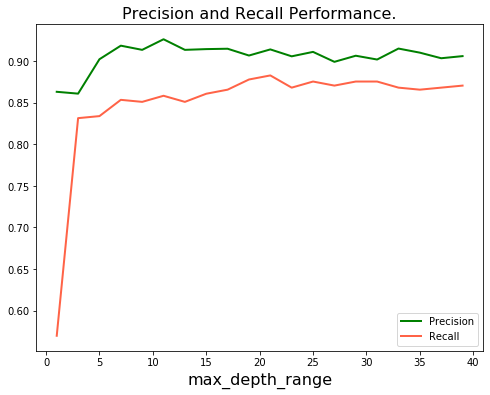

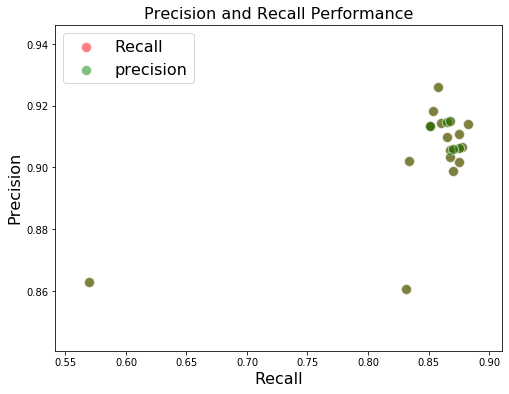

In [12]:
import numpy as np
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()

X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size=0.25)

#max_depths range
max_depth_range = list(range(1, 40, 2))


# YOUR CODE HERE
df_Model = []
precision = []
recall = []
for depth in max_depth_range:
    df_Model.append(build_dt_class_model(X_train1, y_train1, depth))
#     print("max_depth {} get depth {}".format(depth, dt_model.get_depth()))
    


#Build model for max_depths of within a range(1-40, size=20)
for idx, df in enumerate(df_Model):
    print("max_depth {} get depth {}".format(max_depth_range[idx], df.get_depth()))
    y_pred_valid = df.predict(X_valid)
    precision.append(calculate_precision(y_valid, y_pred_valid))
    recall.append(calculate_recall(y_valid, y_pred_valid))

#plot the precision and recall performance
def plot_line(recall, precision, max_depth_range):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
    plt.plot(max_depth_range, precision, color='green',label="Precision", linewidth=2)
    plt.plot(max_depth_range, recall, color="tomato", markersize=8,
            label="Recall", linewidth=2)
    ax.set_xlabel("max_depth_range", fontsize=16)
    ax.set_title("Precision and Recall Performance.", fontsize=16)
    ax.legend()




plot_line(recall, precision, max_depth_range)

def plot_scatter(recall, precision):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
    
    name_color_dict = {
        0: ("red", "Recall"),
        1:("green", "precision")
    }
    for i in [0,1]:
        ax.scatter(recall, precision, color=name_color_dict[i][0], label=name_color_dict[i][1], alpha=0.5, s=100,
                   zorder=2, edgecolors="white")
    ax.legend(loc="upper left", fontsize=16)
    ax.set_xlabel("Recall", fontsize=16)
    ax.set_ylabel("Precision", fontsize=16)
    ax.set_title("Precision and Recall Performance", fontsize=16)
plot_scatter(recall, precision)

### Analysis

Answer the below question regarding the output you generated above (short answer, 2-3 sentances each please):

0. Just because we let max_depth increase doesn't mean the depth actually goes to that depth. Report the maximal true depth the model reaches for the largest max_depth parameter you test.
1. Does the classifier max_depth which has the best RECALL performance also have the best PRECISION performance? 
2. Why would you choose a classifier based on RECALL rather than PRECISION or vice versa? How would you make your selection for this dataset? 
3. What general trends do you observe in recall and precision performance as the max depth parameter increases? Because your validation split is random, you can try re-running multiple times to see what happens.

YOUR ANSWER HERE

0. The maximal true depth is 34 for the largest max_depth parementer. (it changed every times I ran code, it range from 27 to 34)

1. Yes, classifier max_depth has the best RECALL performance also have the best PRECISION performance.

2. I choose a classifier based on recall because high recall tell the us the class is correctly recognized and we know the small number of false negitive.

3. When the max depth parameter increased, recall and precision performance got the closer number of percentages. 

### Final Test Assessment 

For your final task, select a value for `max_depth` based on your analysis above. We provide a code cell and a markdown cell. In the code cell:

1. Re-fit the classifier using all the training data using your value for `max_depth`.
2. Predict and report precision/recall on the test set. 

In the markdown cell:

1. Explain why you chose the `max_depth` parameter. (There's not necessarily one right answer to this). But if you are classifying emails, you probably don't want to OVER classify as spam and filter out important emails, unless you are deathly allergic to SPAM. 

In [13]:
# YOUR CODE HERE
df_model = build_dt_class_model(X_train, y_train, max_depth = 15)
y_pred = df_model.predict(X_test)
precision = calculate_precision(y_test, y_pred)
recall = calculate_recall(y_test, y_pred)
print("Precision on the test set: {:0.4f}".format(precision))
print("Recall on the test set: {:0.4f}".format(recall))

Precision on the test set: 0.8786
Recall on the test set: 0.8837


YOUR ANSWER HERE

I chose the max depth $15$ because we don't want to over classify as spam and filter out important emails and the recall get higher so we can classify more correctly. If we choose the max depth is larger, the tree is very deep and the more split it and capture more information about spam, but the recall would not be much different from max depth $15$. However, the deeper tree might be over-fitting because the train dataset get less validation error and the test dataset get more validation error.